# Customer Campaign Participation Analysis


**Dataset:** [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)


**Dataset description:** The dataset contains 2240 rows and 29 columns.


**_Columns_:**

_ID_: Customer's unique identifier

_Year_Birth_: Customer's birth year

_Education_: Customer's education level

_Marital_Status_: Customer's marital status

_Income_: Customer's yearly household income

_Kidhome_: Number of children in customer's household

_Teenhome_: Number of teenagers in customer's household

_Dt_Customer_: Date of customer's enrollment with the company

_Recency_: Number of days since customer's last purchase

_Complain_: 1 if the customer complained in the last 2 years, 0 otherwise

_MntWines_: Amount spent on wine in last 2 years

_MntFruits_: Amount spent on fruits in last 2 years

_MntMeatProducts_: Amount spent on meat in last 2 years

_MntFishProducts_: Amount spent on fish in last 2 years

_MntSweetProducts_: Amount spent on sweets in last 2 years

_MntGoldProds_: Amount spent on gold in last 2 years

_NumDealsPurchases_: Number of purchases made with a discount

_AcceptedCmp1_: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

_AcceptedCmp2_: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

_AcceptedCmp3_: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

_AcceptedCmp4_: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

_AcceptedCmp5_: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

_Response_: 1 if customer accepted the offer in the last campaign, 0 otherwise

_NumWebPurchases_: Number of purchases made through the company’s website

_NumCatalogPurchases_: Number of purchases made using a catalogue

_NumStorePurchases_: Number of purchases made directly in stores

_NumWebVisitsMonth_: Number of visits to company’s website in the last month


**Goal:** I am going to predict if the customer accepted the offer in the latest campaign.


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

In [2]:
from itertools import product

In [3]:
import sklearn

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.svm import SVC

from sklearn.metrics import classification_report, f1_score

from pretty_confusion_matrix import pp_matrix_from_data

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('../data/marketing_campaign.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


There are no infinity records.

In [7]:
numeric_columns = df.describe().columns.to_list()

In [8]:
df.describe(include=[object])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [9]:
for col in [col for col in df if df[col].isna().sum() > (0.2 * df.shape[0])]:
    print(f"{col} - Missing values: {(df[col].isna().sum() / df.shape[0]):.2f} %")

The _Income_ column has missing values in 24 rows.

In [10]:
categorical_columns = []
binary_columns = []

In [11]:
for column in df:
    column_type = df[column].dtype
    unique_values = df[column].unique()
    count_unique_values = len(unique_values)

    if count_unique_values < 10:
        if count_unique_values == 2:
            binary_columns.append(column)
        else:
            categorical_columns.append(column)
        print(f'{column:20} | {column_type} | {count_unique_values:5} | {unique_values}')

Education            | object |     5 | ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status       | object |     8 | ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Kidhome              | int64 |     3 | [0 1 2]
Teenhome             | int64 |     3 | [0 1 2]
AcceptedCmp3         | int64 |     2 | [0 1]
AcceptedCmp4         | int64 |     2 | [0 1]
AcceptedCmp5         | int64 |     2 | [0 1]
AcceptedCmp1         | int64 |     2 | [0 1]
AcceptedCmp2         | int64 |     2 | [0 1]
Complain             | int64 |     2 | [0 1]
Z_CostContact        | int64 |     1 | [3]
Z_Revenue            | int64 |     1 | [11]
Response             | int64 |     2 | [1 0]


The _Education_, _Kidhome_, _Teenhome_ and _Marital_Status_ columns are categorical.

The _AcceptedCmp1_, _AcceptedCmp2_, _AcceptedCmp3_, _AcceptedCmp4_, _AcceptedCmp5_, _Complain_ columns are binary.

The _Z_CostContact_ and _Z_Revenue_ columns have a single unique value.


In [12]:
# remove categorical columns from numeric
for column in categorical_columns:
    if column in numeric_columns:
        numeric_columns.remove(column)

# remove binary columns from numeric
for column in binary_columns:
    if column in numeric_columns:
        numeric_columns.remove(column)

In [13]:
# remove columns with a single unique value from categorical
categorical_columns.remove('Z_CostContact')
categorical_columns.remove('Z_Revenue')

In [14]:
# remove target from categorical columns
binary_columns.remove('Response')

In [15]:
for col in [col for col in df if df[col].unique().shape[0] > (0.2 * df.shape[0])]:
    print(f"{col} - Unique values: {(df[col].unique().shape[0] / df.shape[0]):.2f} %")

ID - Unique values: 1.00 %
Income - Unique values: 0.88 %
Dt_Customer - Unique values: 0.30 %
MntWines - Unique values: 0.35 %
MntMeatProducts - Unique values: 0.25 %


The _IG_ column is index.

In [16]:
numeric_columns.remove('ID')

In [17]:
for col in numeric_columns:
    skewness = df[col].skew()
    std = df[col].std()

    l_skewness = np.log1p(df[col]).skew()
    l_std = np.log1p(df[col]).std()

    if skewness > 0.5 and np.abs(l_skewness) <= 0.5:
        print(f'{col:30} | Skw: {skewness:10.2f} => {l_skewness:.2f}')

    if std > 1 and l_std <= 1:
        print(f'{col:30} | Std: {std:10.2f} => {l_std:.2f}')

Year_Birth                     | Std:      11.98 => 0.01
Income                         | Std:   25173.08 => 0.51
Recency                        | Std:      28.96 => 0.95
MntFruits                      | Skw:       2.10 => 0.08
MntMeatProducts                | Skw:       2.08 => -0.08
MntFishProducts                | Skw:       1.92 => -0.05
MntSweetProducts               | Skw:       2.14 => 0.09
MntGoldProds                   | Skw:       1.89 => -0.34
NumDealsPurchases              | Std:       1.93 => 0.47
NumWebPurchases                | Skw:       1.38 => -0.26
NumWebPurchases                | Std:       2.78 => 0.56
NumCatalogPurchases            | Skw:       1.88 => 0.13
NumCatalogPurchases            | Std:       2.92 => 0.77
NumStorePurchases              | Skw:       0.70 => -0.14
NumStorePurchases              | Std:       3.25 => 0.49
NumWebVisitsMonth              | Std:       2.43 => 0.47


Most numeric columns are **skewed**.

## Plots

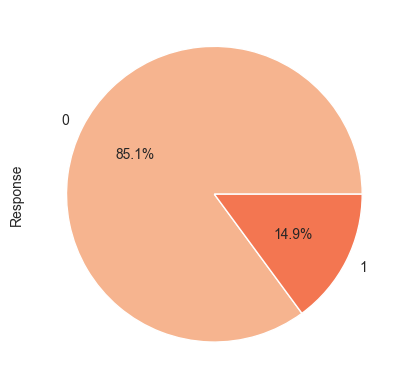

In [18]:
sns.set_palette('rocket_r')
df['Response'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

The **target** classes are **imbalanced**.

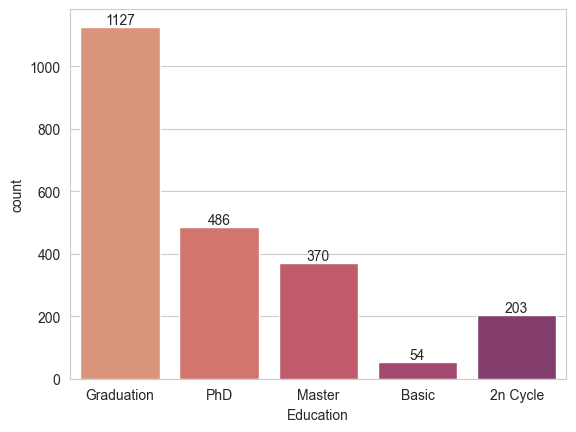

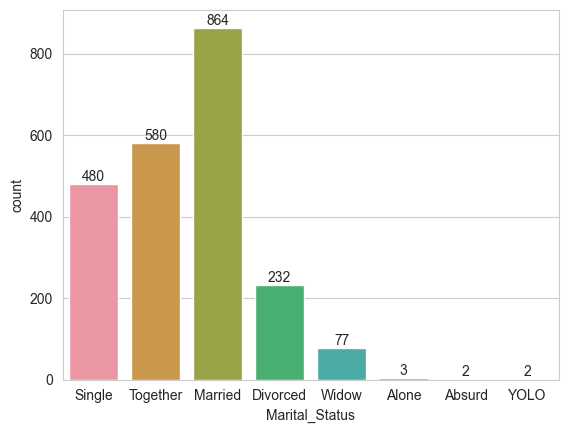

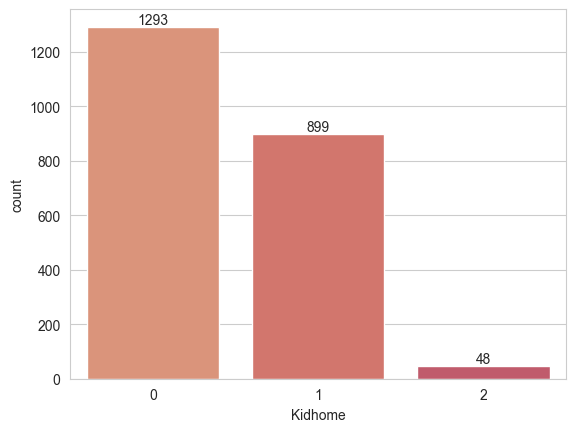

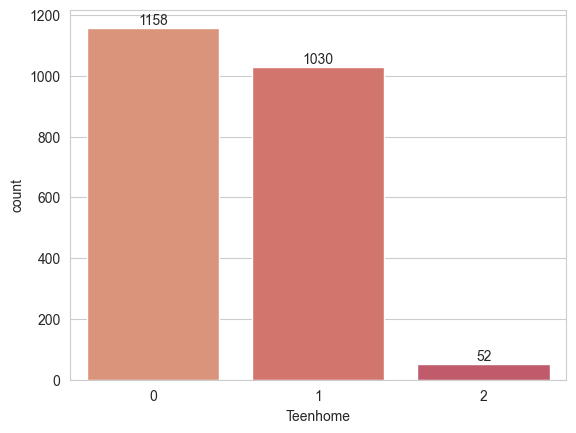

In [19]:
for column in categorical_columns:
    sns.set_palette('flare')
    p = sns.countplot(data=df, x=column)
    p.bar_label(p.containers[0])
    plt.show()

The categories are **imbalanced**.

The 'Alone' values of the _Marital_Status_ could be changed to 'Single', and the 'Absurd' and 'YOLO' columns can be combined in 'Other'.

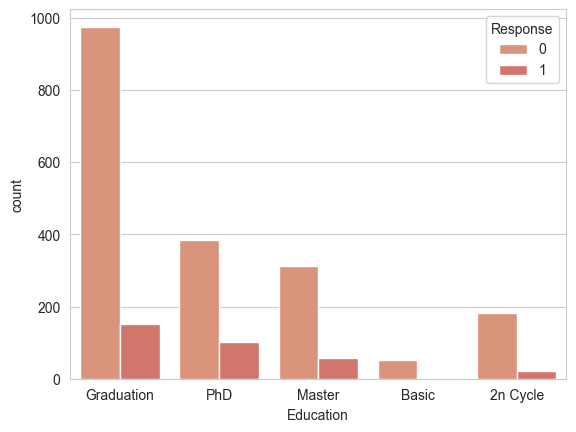

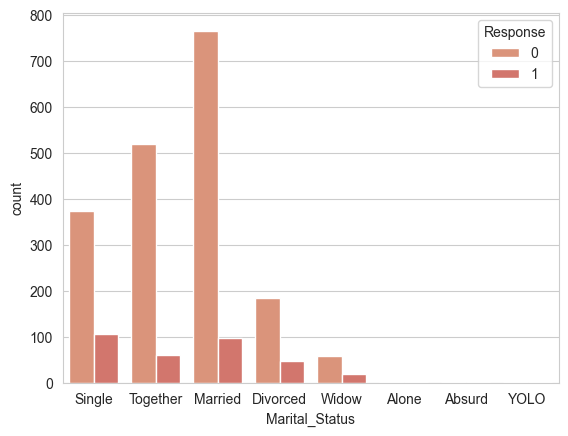

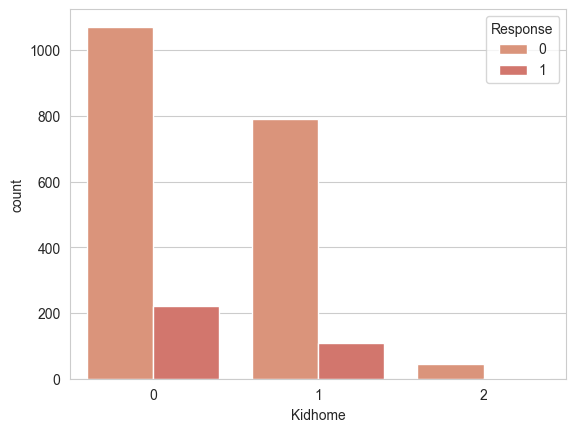

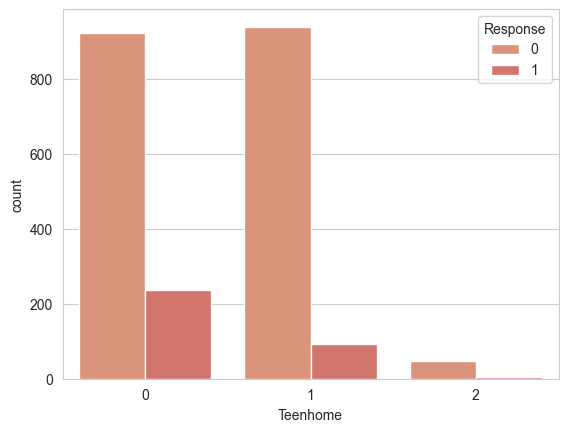

In [20]:
for column in categorical_columns:
    sns.set_palette('flare')
    p = sns.countplot(data=df, x=column, hue='Response')
    plt.show()

**Single** people with **no children** at home seem to be more likely to respond.

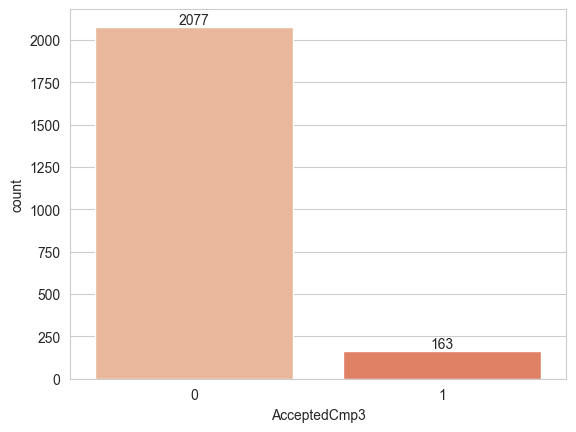

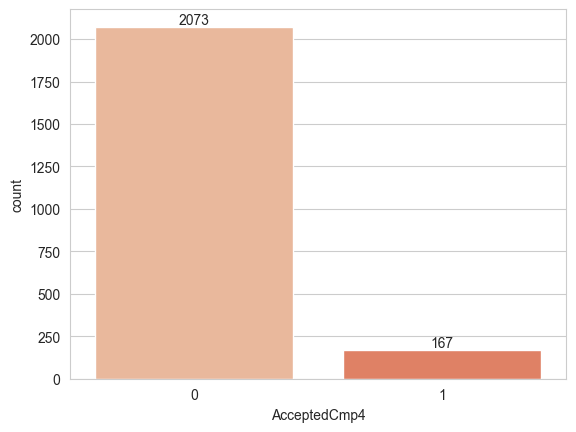

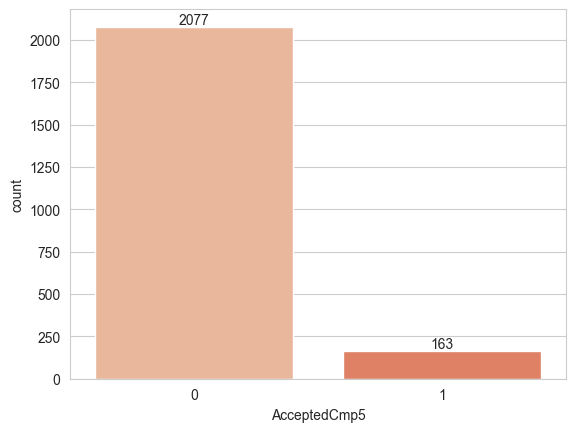

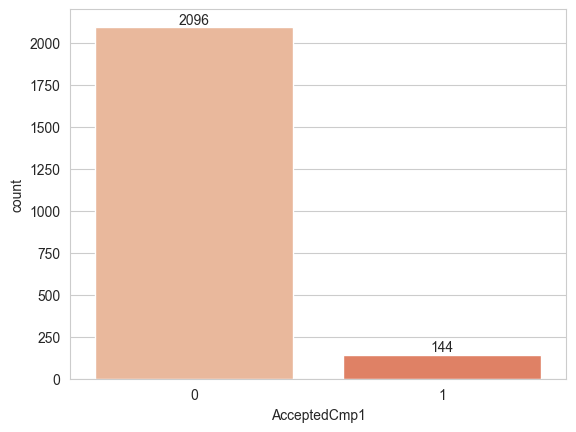

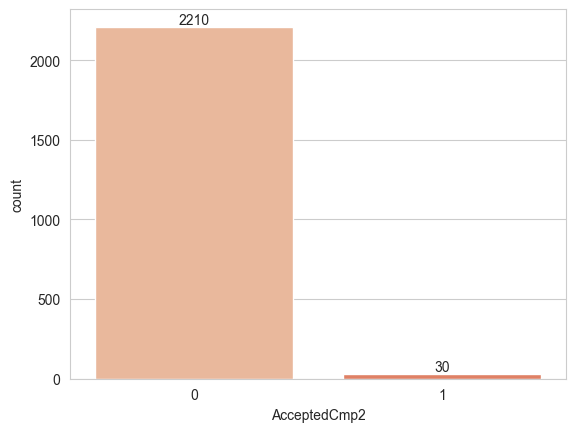

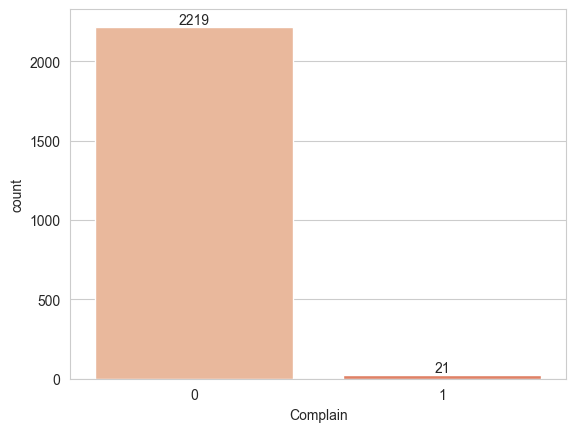

In [21]:
for column in binary_columns:
    sns.set_palette('rocket_r')
    p = sns.countplot(data=df, x=column)
    p.bar_label(p.containers[0])
    plt.show()

The binary columns are also **imbalanced**.

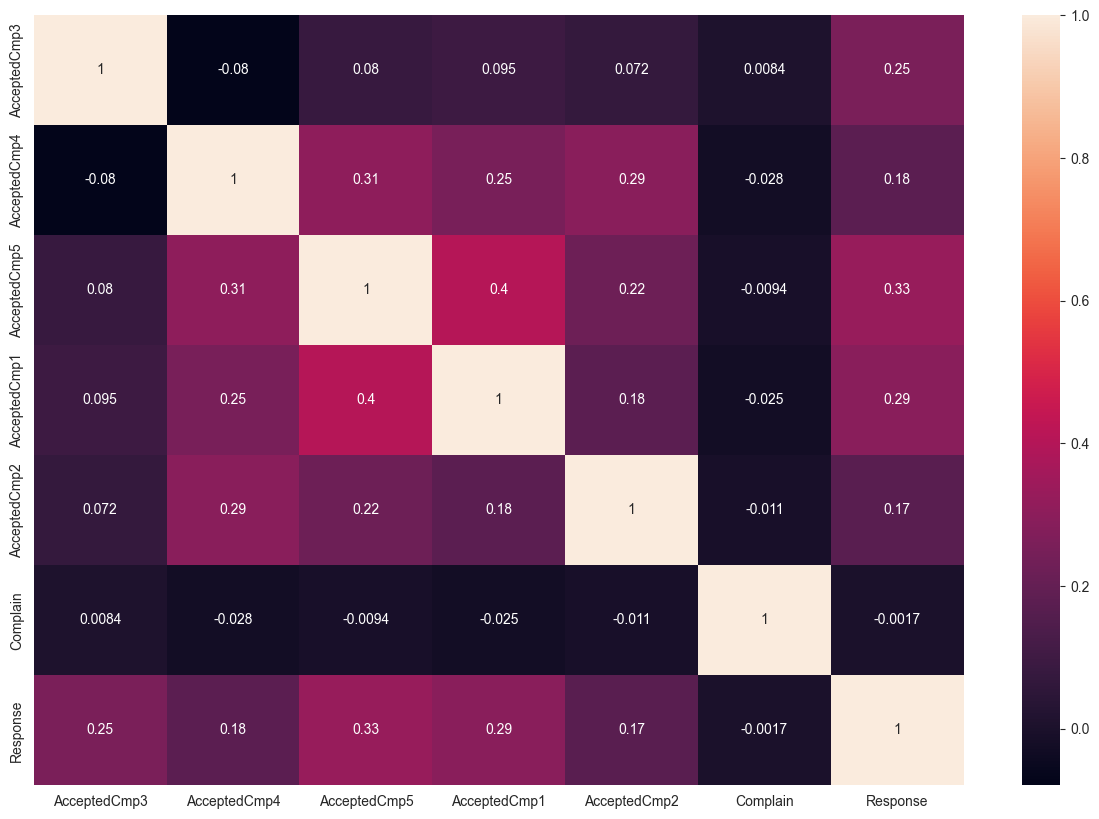

In [22]:
temp_df = pd.DataFrame(df[np.concatenate((binary_columns, ['Response']), axis=0)])
plt.figure(figsize=(15, 10))
sns.heatmap(temp_df.corr(), annot=True)
plt.show()

If the customer complained in the last 2 years they are less likely to participate in the campaigns.

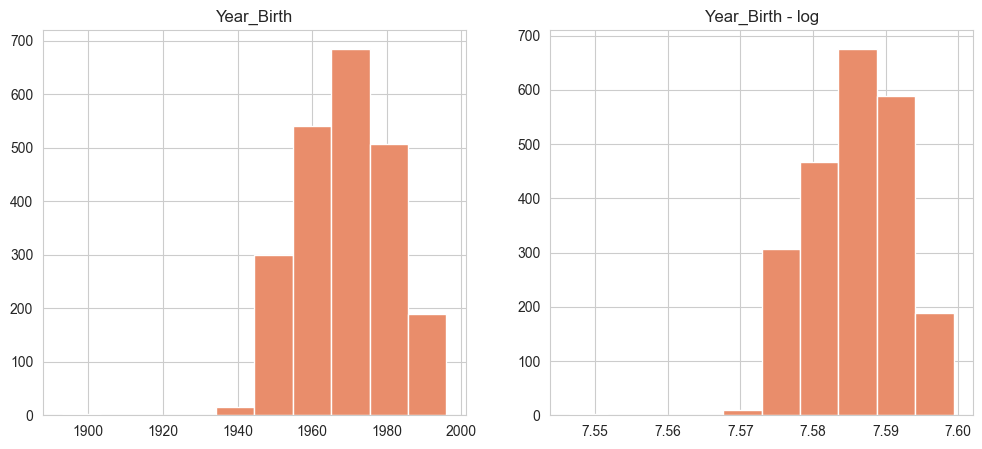

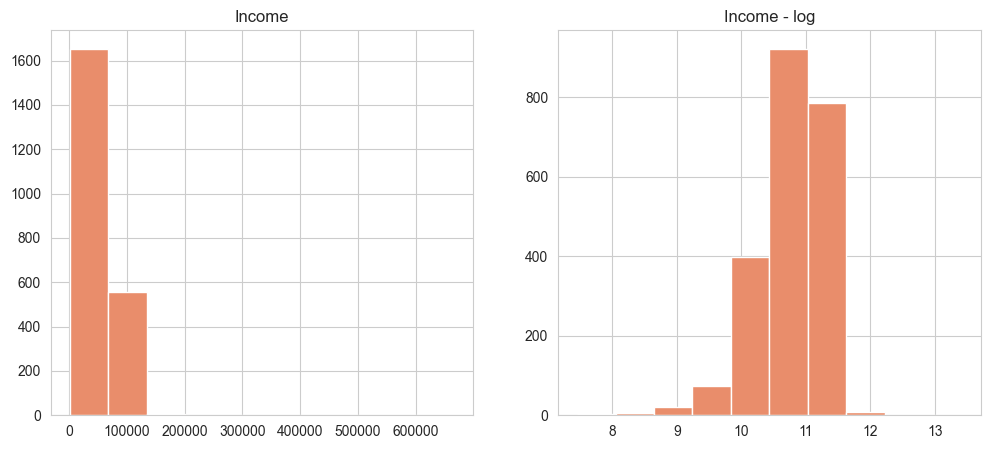

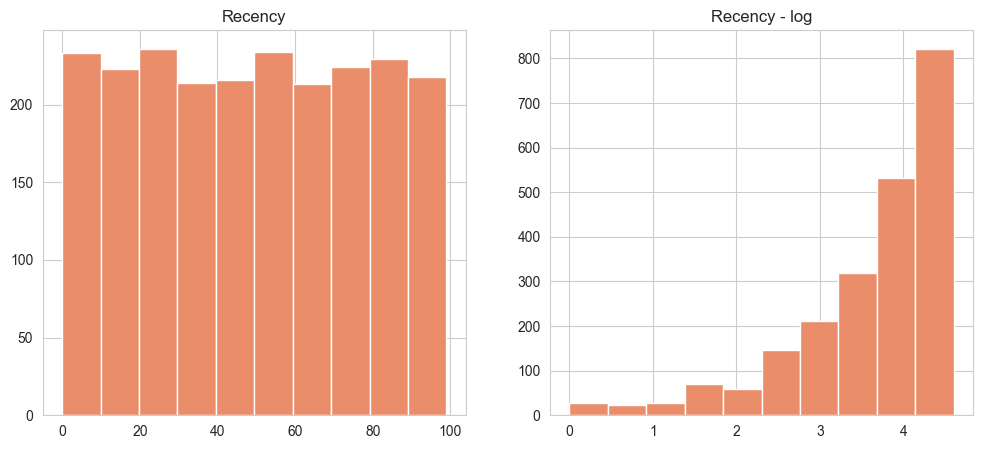

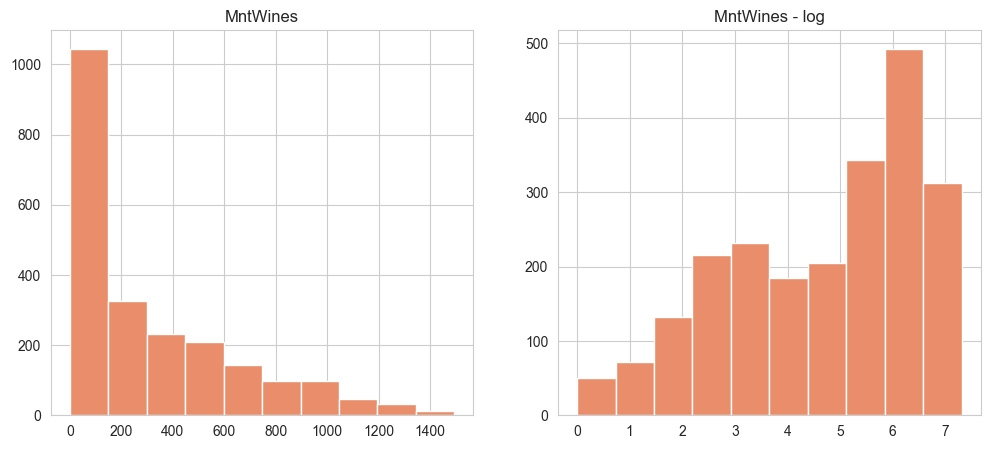

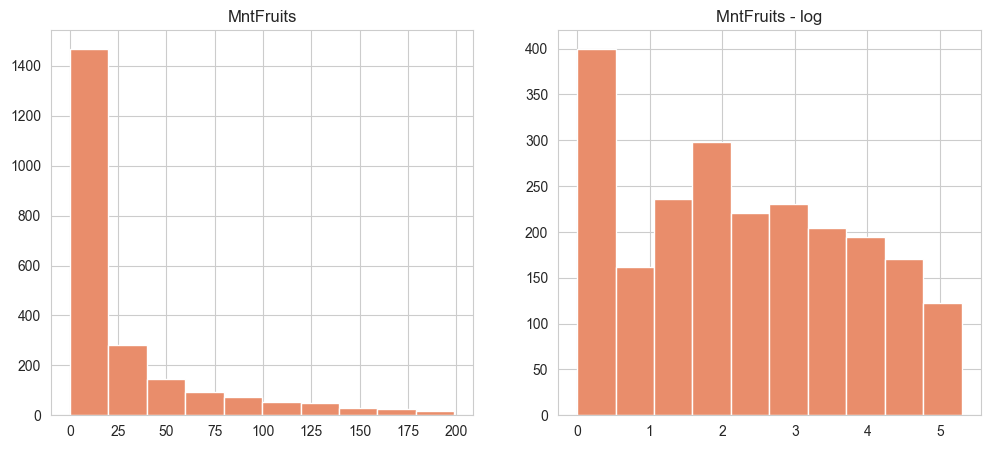

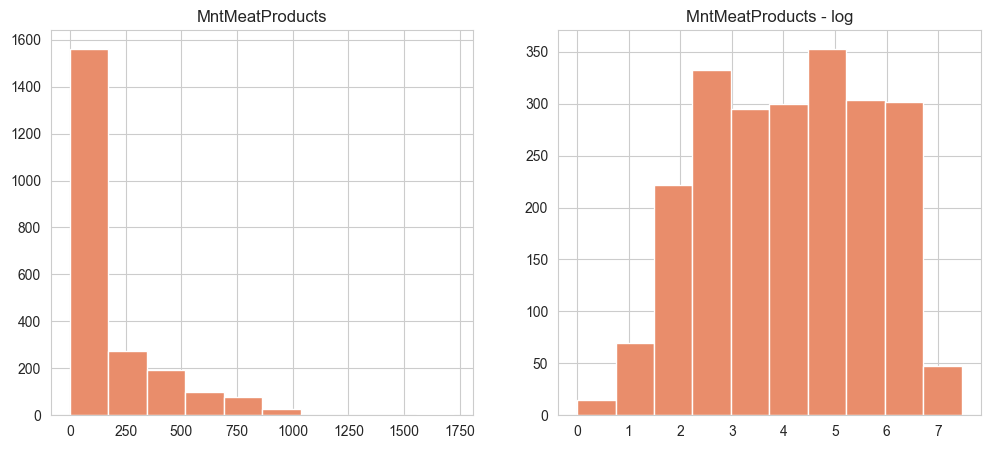

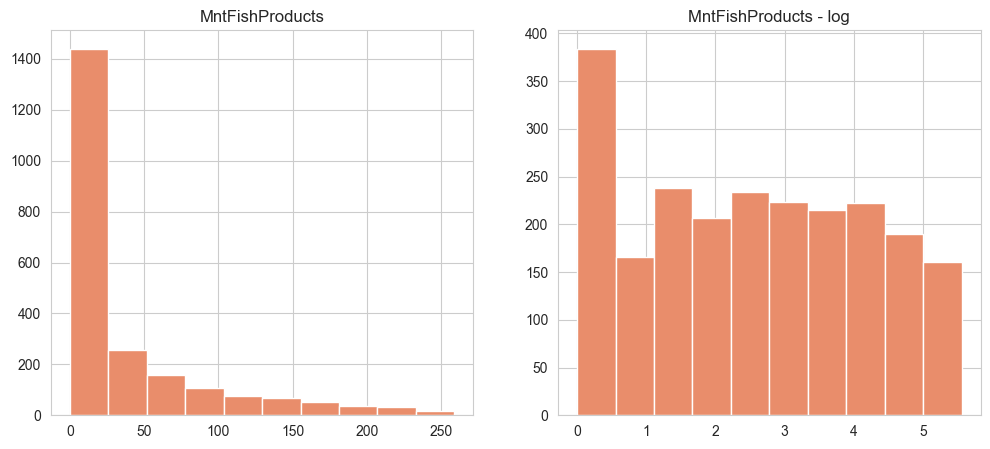

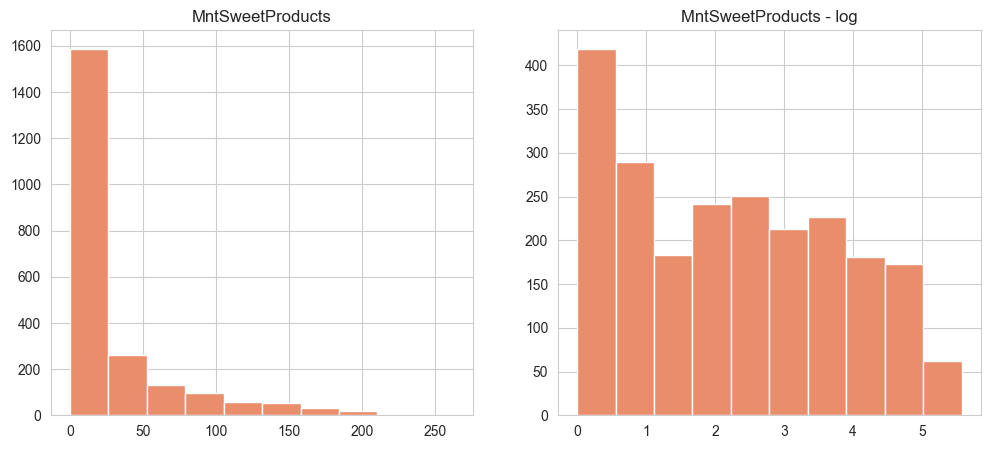

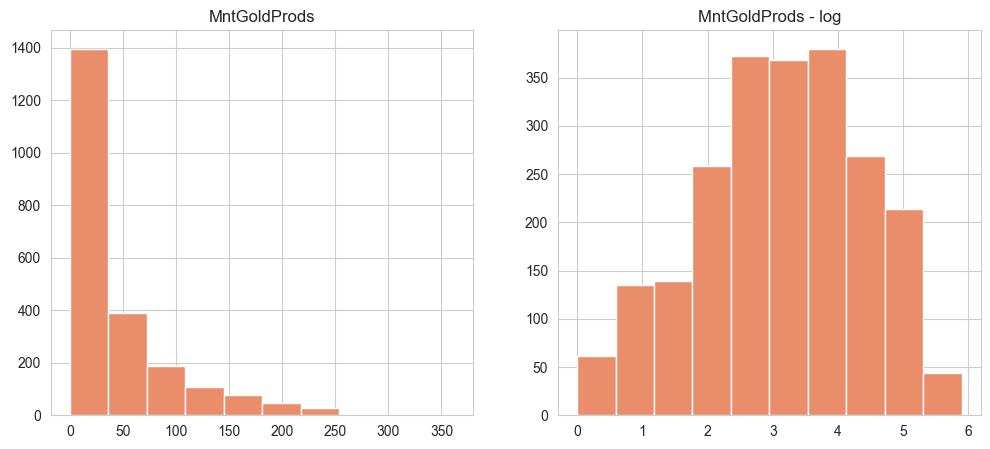

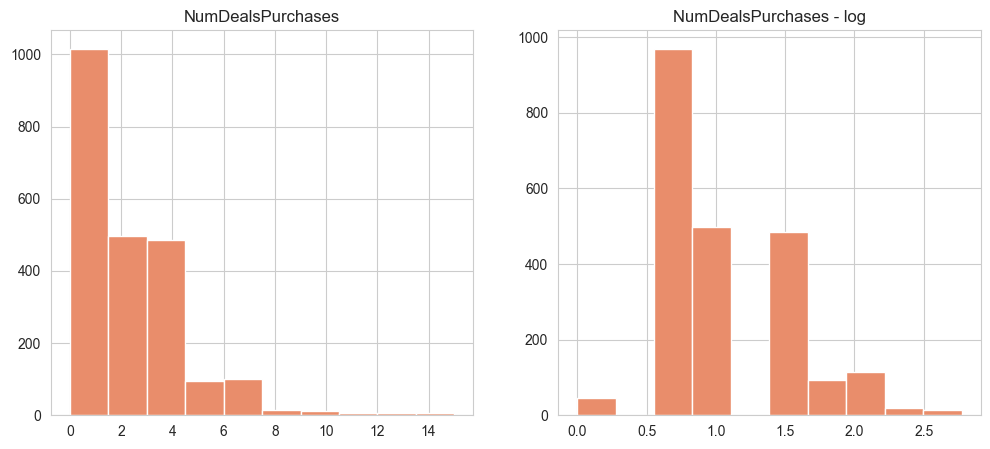

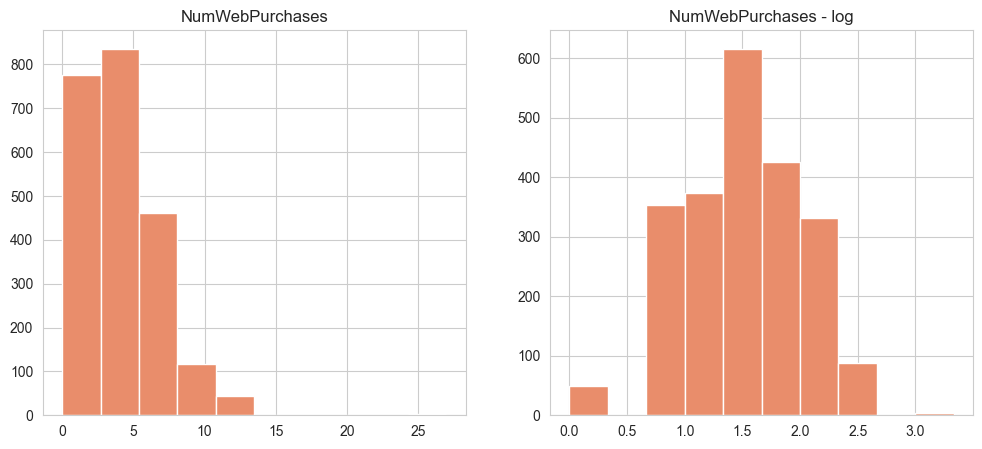

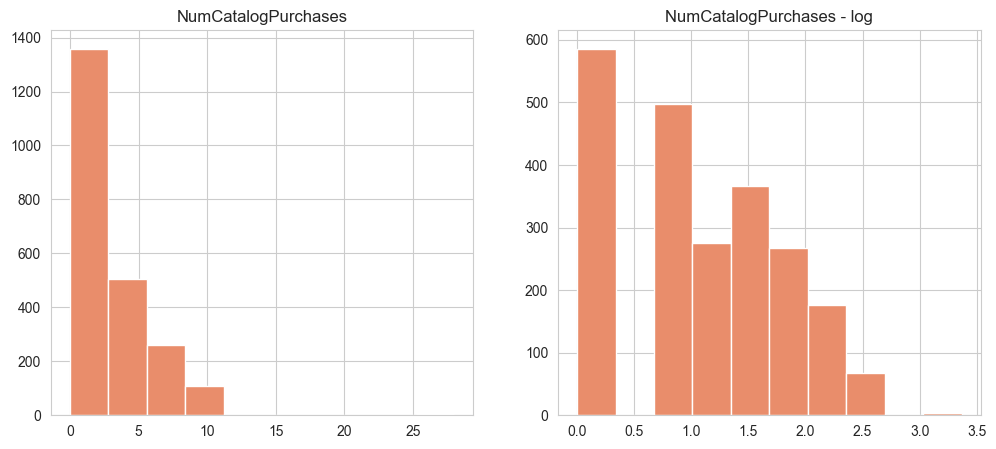

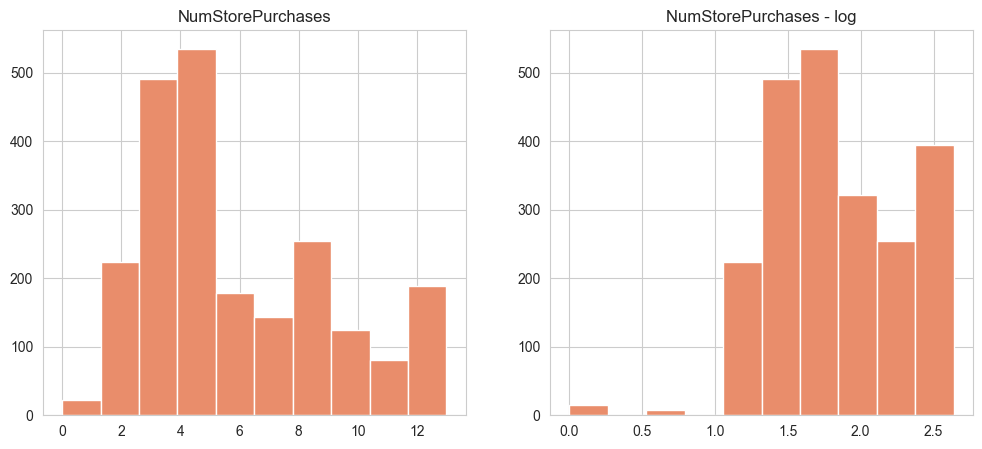

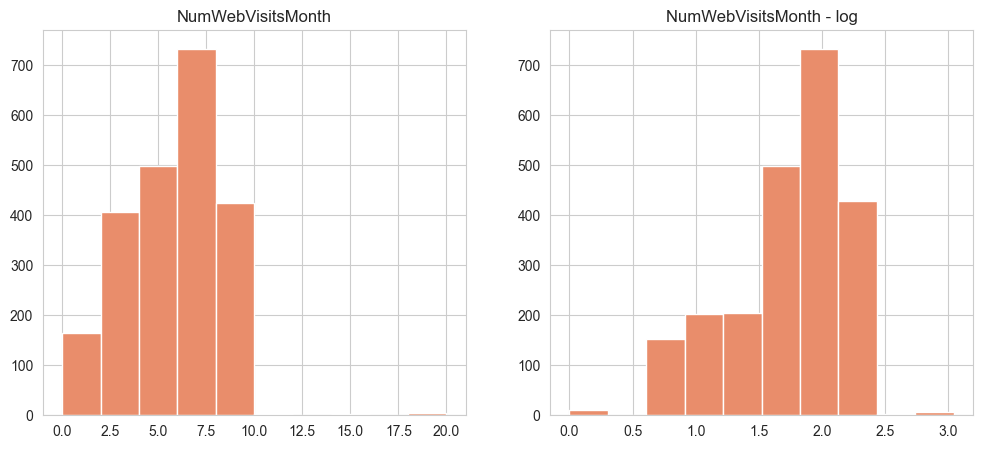

In [23]:
for col in numeric_columns:
    sns.set_palette('flare')
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax.flat[0].hist(df[col])
    ax.flat[0].set_title(f'{col}')
    ax.flat[1].hist(np.log1p(df[col]))
    ax.flat[1].set_title(f'{col} - log')
    plt.show()

Using logarithm on most numeric columns could be helpful.

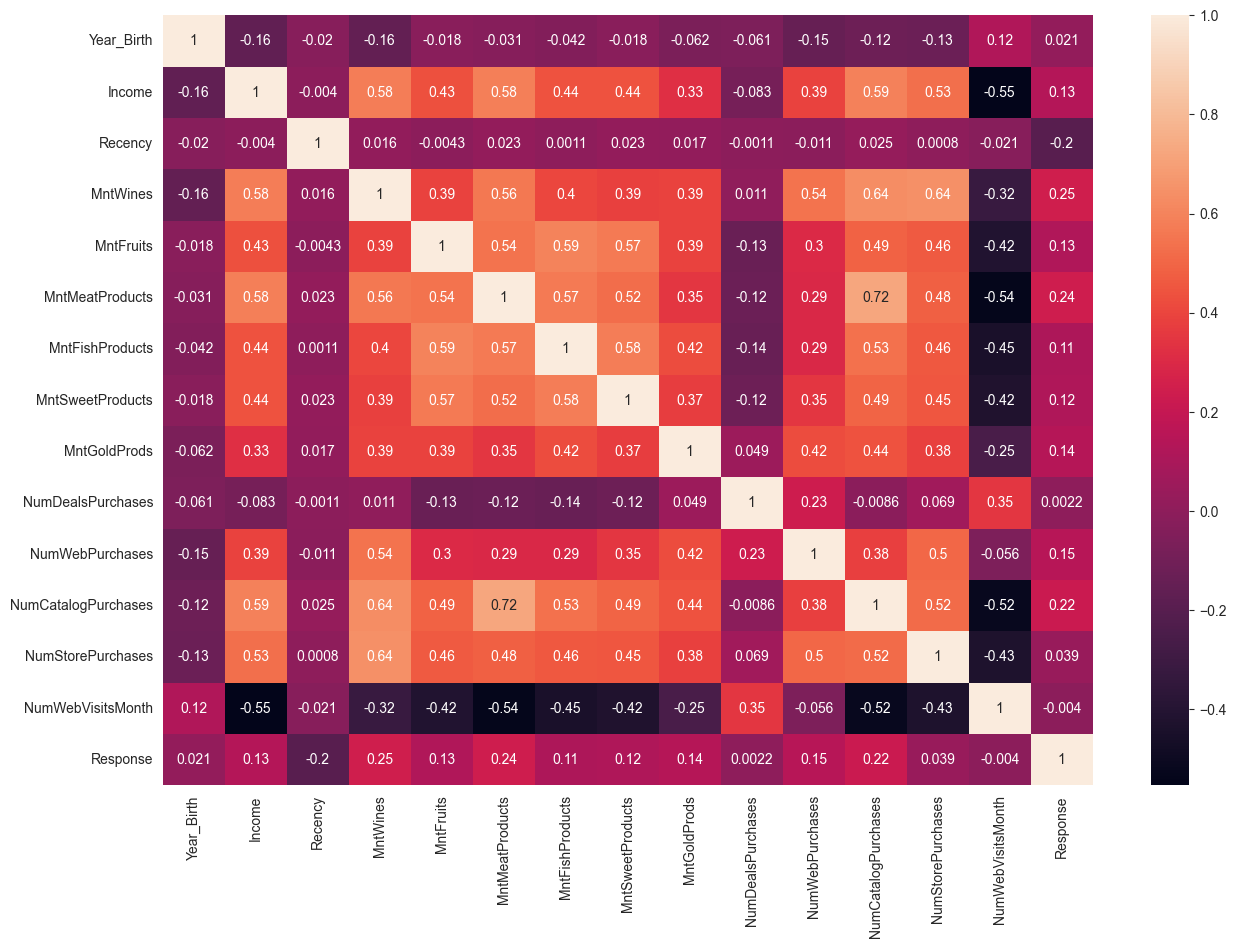

In [24]:
temp_df = pd.DataFrame(df[np.concatenate((numeric_columns, ['Response']), axis=0)])
plt.figure(figsize=(15, 10))
sns.set_palette('icefire')
sns.heatmap(temp_df.corr(), annot=True)
plt.show()

There is a negative correlation between _Recency_ and _Response_.

<AxesSubplot: xlabel='Response', ylabel='Recency'>

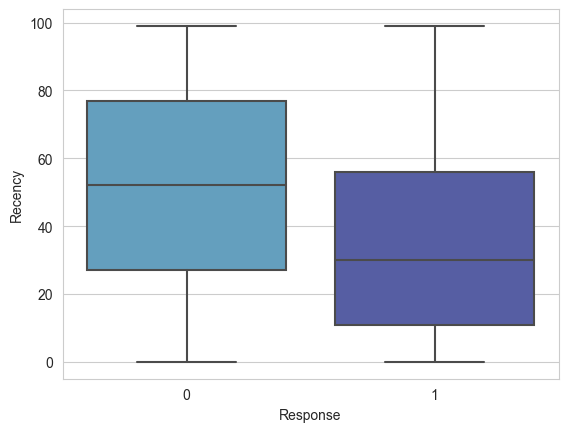

In [25]:
sns.boxplot(data=df, x='Response', y='Recency')

# Model Training

## First try

### Preprocessing

In [26]:
def preprocess_inputs(df, scale=False):
    df = df.copy()

    # drop columns
    df = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

    # fill the missing values in Income with mode
    df['Income'] = df['Income'].fillna(df['Income'].mode()[0])

    # replace Marital_Status values
    df = df.replace('Alone','Single') # replace 'Alone' with 'Single'
    df = df.replace('YOLO', 'Other') # replace 'YOLO' with 'Other'
    df = df.replace('Absurd','Other') # replace 'Absurd' with 'Other'

    # log some numerical columns
    log_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    for col in log_columns:
        df[col] = np.log1p(df[col])

    # one hot encode columns
    one_hot_columns = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
    dummies = pd.get_dummies(df[one_hot_columns])
    df = df.drop(one_hot_columns, axis=1)

    result = pd.concat([df, dummies], axis=1)

    X = result.drop(['Response'], axis=1)
    y = result['Response']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    if scale:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [27]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True)

### Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.9017857142857143
Test score:  0.8913690476190477


<AxesSubplot: >

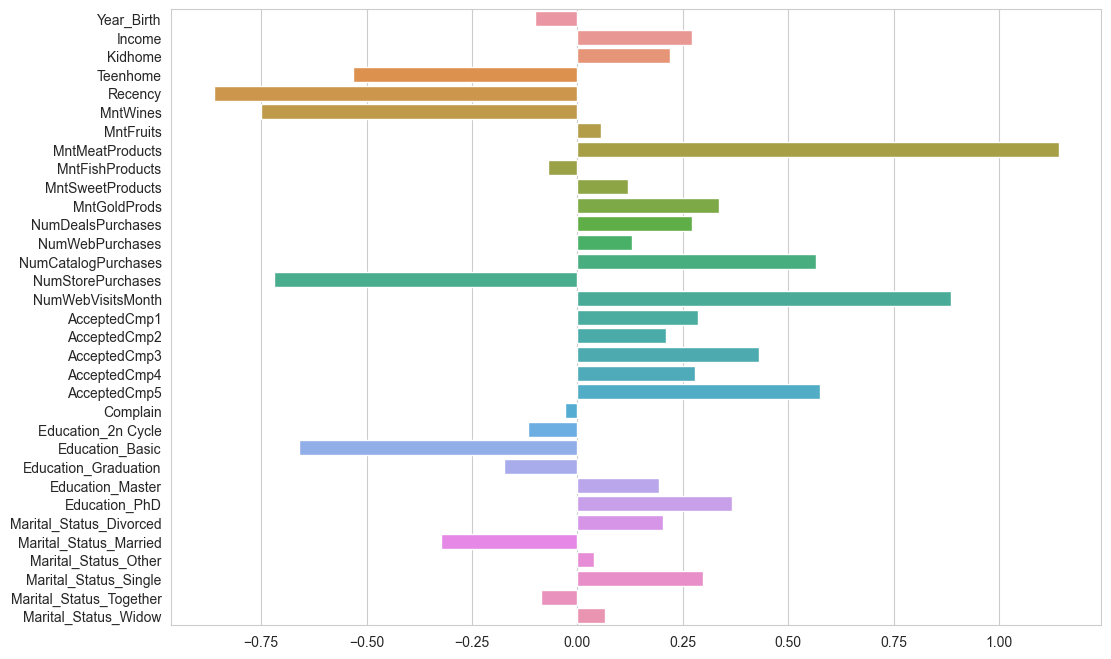

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train.columns, orient='horizontal')

In [30]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       570
           1       0.69      0.51      0.59       102

    accuracy                           0.89       672
   macro avg       0.80      0.73      0.76       672
weighted avg       0.88      0.89      0.88       672



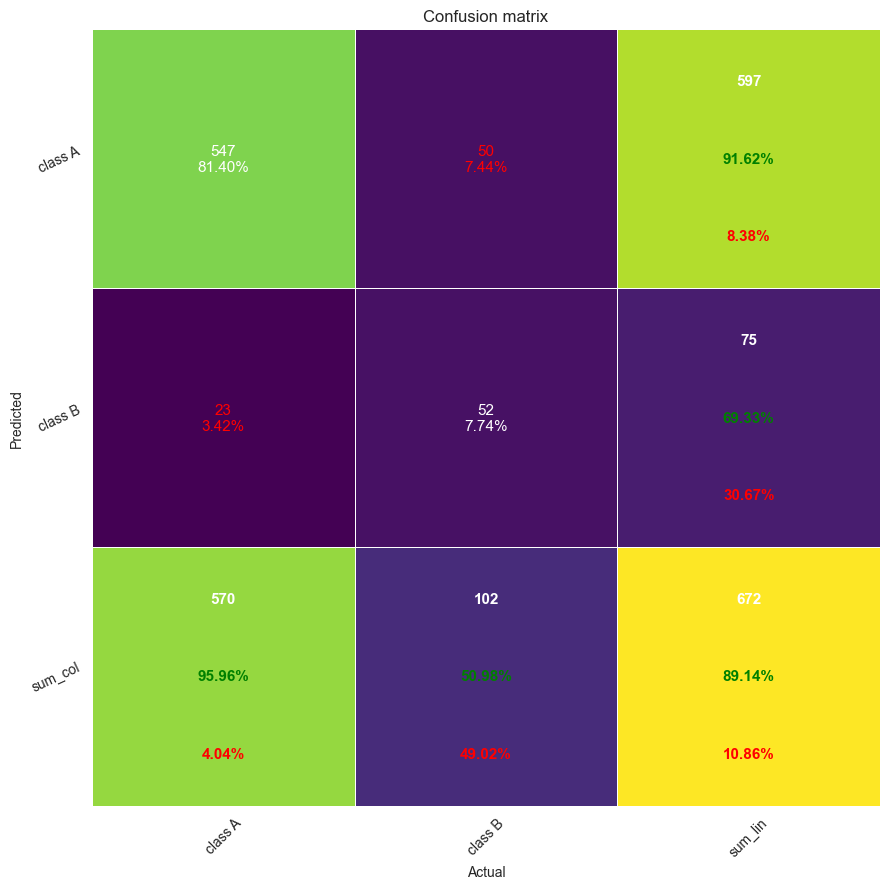

In [31]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion:** Logistic regression does not recognise well Response class 1 and does 'well' because of the class imbalance.

### KNN

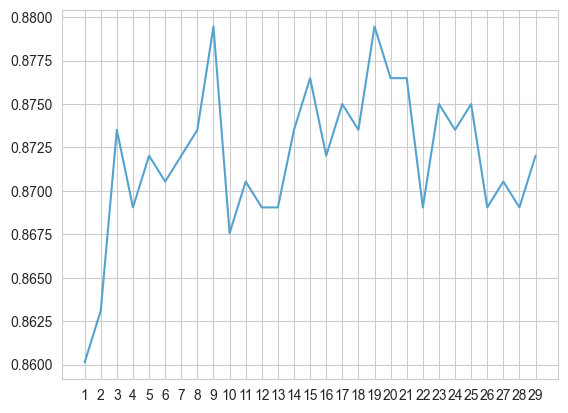

Best N value: 9


In [32]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train, y_train)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [33]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       570
           1       0.76      0.30      0.43       102

    accuracy                           0.88       672
   macro avg       0.82      0.64      0.68       672
weighted avg       0.87      0.88      0.86       672



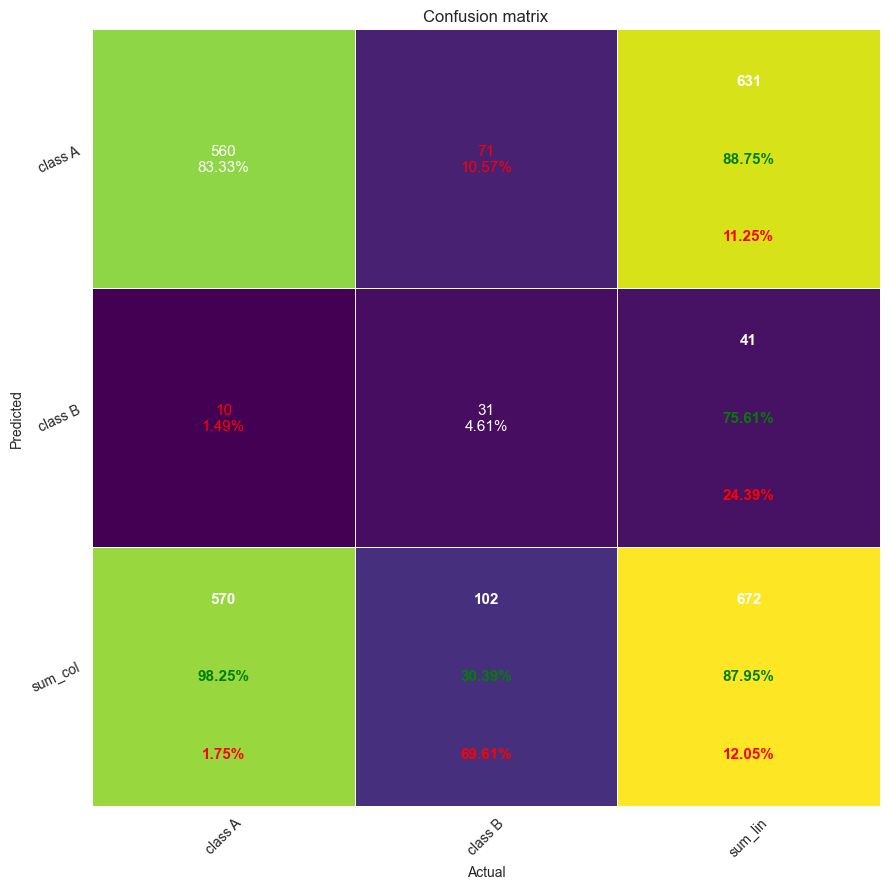

In [34]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: KNN has overall worse performance than logistic regression.

### Decision Tree

In [35]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [36]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

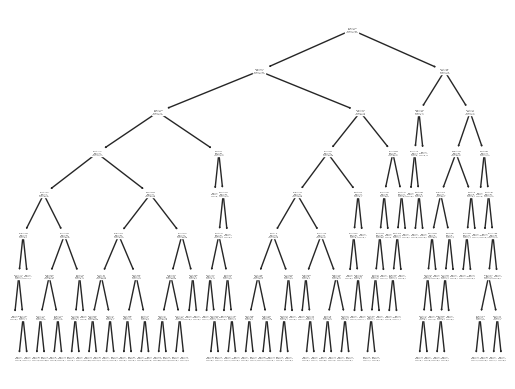

In [37]:
plot_tree(model)
plt.show()

In [38]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       570
           1       0.61      0.44      0.51       102

    accuracy                           0.87       672
   macro avg       0.76      0.70      0.72       672
weighted avg       0.86      0.87      0.86       672



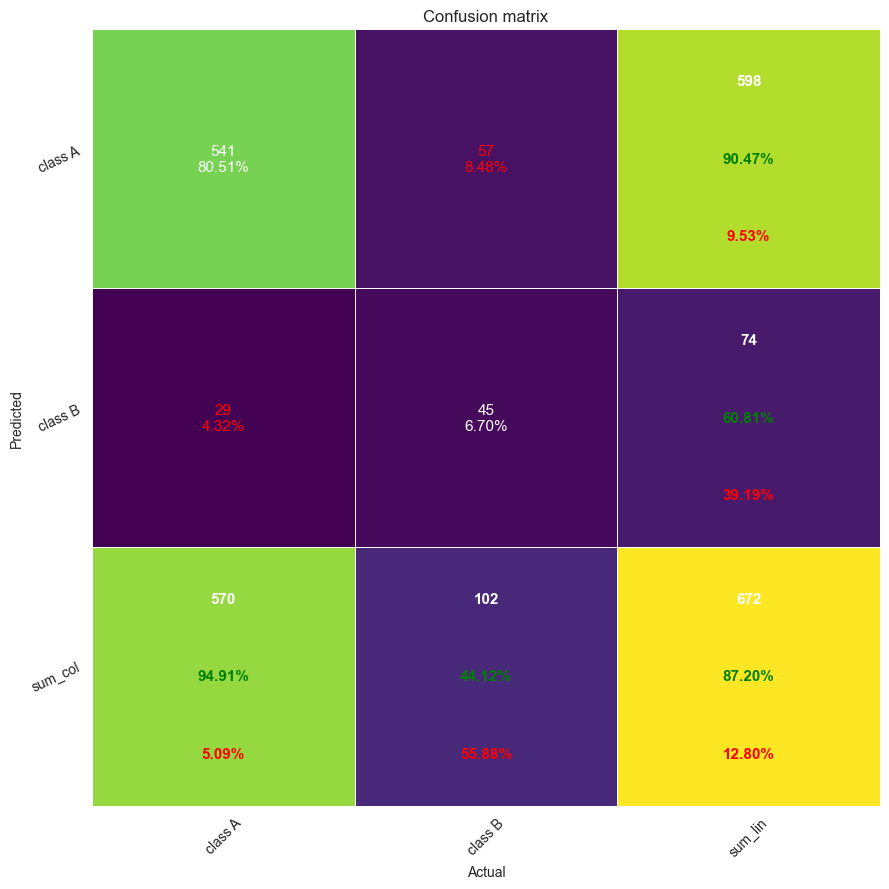

In [39]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Decision tree performs similar to logistic regression on class 1 but worse on class 0.

### Random Forest

In [40]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [41]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       570
           1       0.62      0.44      0.51       102

    accuracy                           0.87       672
   macro avg       0.76      0.70      0.72       672
weighted avg       0.86      0.87      0.86       672



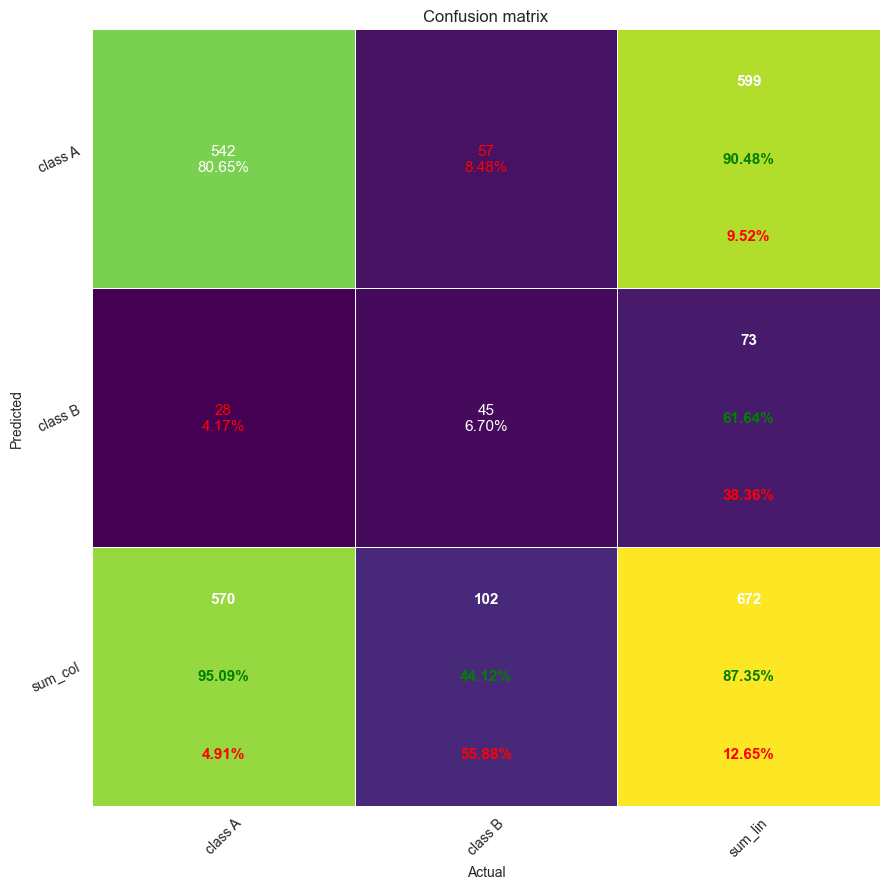

In [43]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

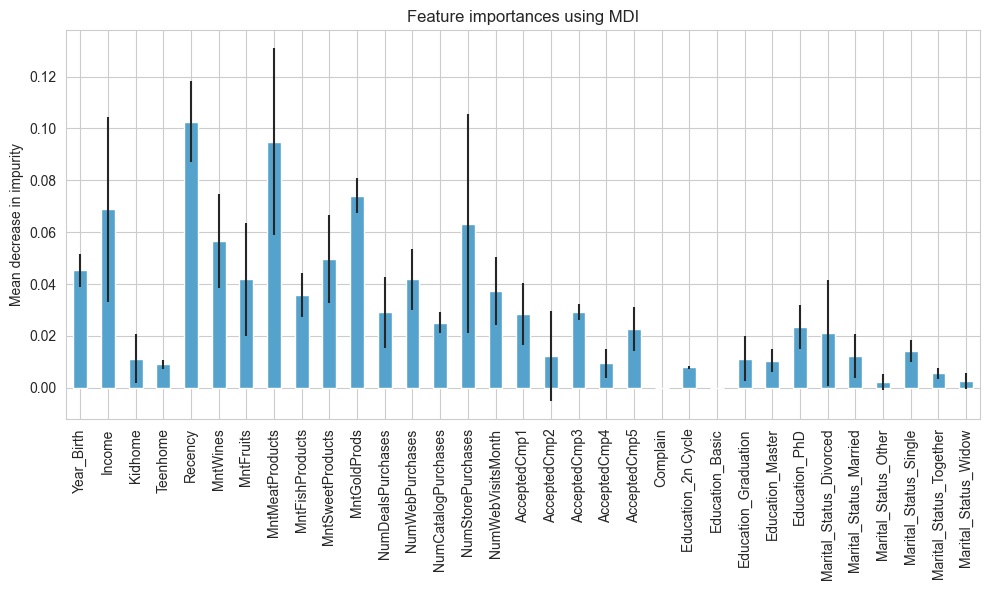

In [44]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train, y_train)

In [46]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       570
           1       0.72      0.40      0.52       102

    accuracy                           0.89       672
   macro avg       0.81      0.69      0.73       672
weighted avg       0.87      0.89      0.87       672



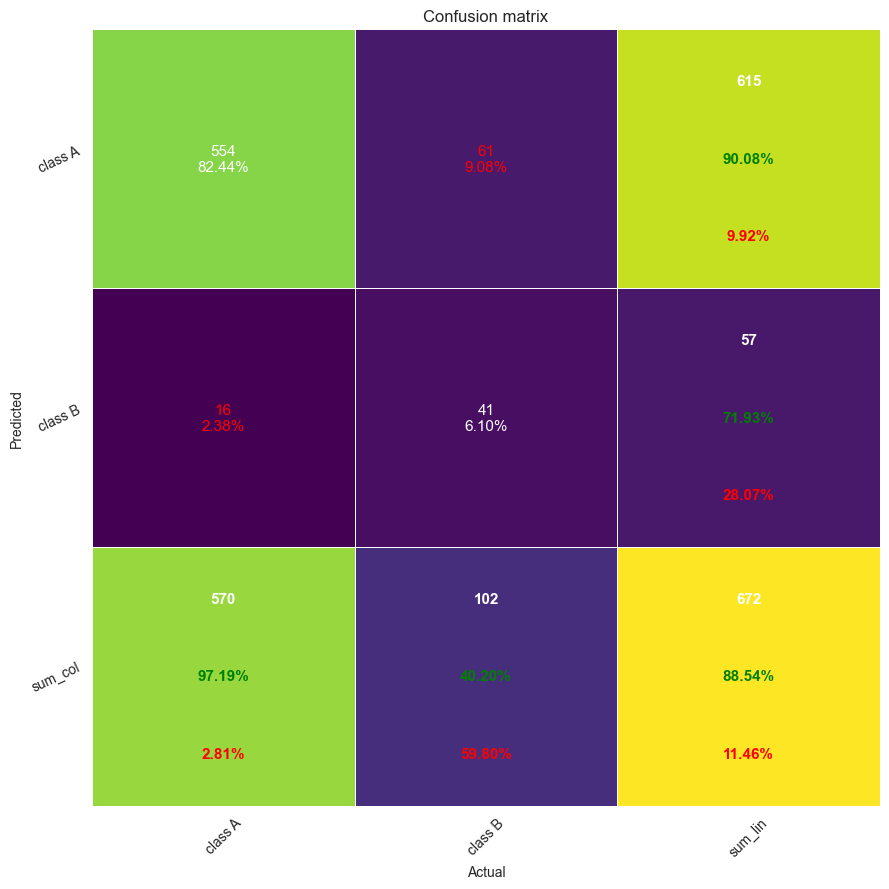

In [47]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

## Add date of enrollment feature

### Preprocessing

In [48]:
# encode date
def transform_date(entry):
    l = list(map(int, entry.split('-')[1:]))
    return l[0] + (l[1] % 100) * 12

In [49]:
def preprocess_inputs(df, scale=False):
    df = df.copy()

    # drop columns
    df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

    # encode date
    df['Dt_Customer'] = [transform_date(df.iloc[index]['Dt_Customer']) for index in range(df.shape[0])]

    # fill the missing values in Income with mode
    df['Income'] = df['Income'].fillna(df['Income'].mode()[0])

    # replace Marital_Status values
    df = df.replace('Alone','Single') # replace 'Alone' with 'Single'
    df = df.replace('YOLO', 'Other') # replace 'YOLO' with 'Other'
    df = df.replace('Absurd','Other') # replace 'Absurd' with 'Other'

    # log some numerical columns
    log_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    for col in log_columns:
        df[col] = np.log1p(df[col])

    # one hot encode columns
    one_hot_columns = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
    dummies = pd.get_dummies(df[one_hot_columns])
    df = df.drop(one_hot_columns, axis=1)

    result = pd.concat([df, dummies], axis=1)

    X = result.drop(['Response'], axis=1)
    y = result['Response']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    if scale:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [50]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True)

### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.9005102040816326
Test score:  0.8913690476190477


<AxesSubplot: >

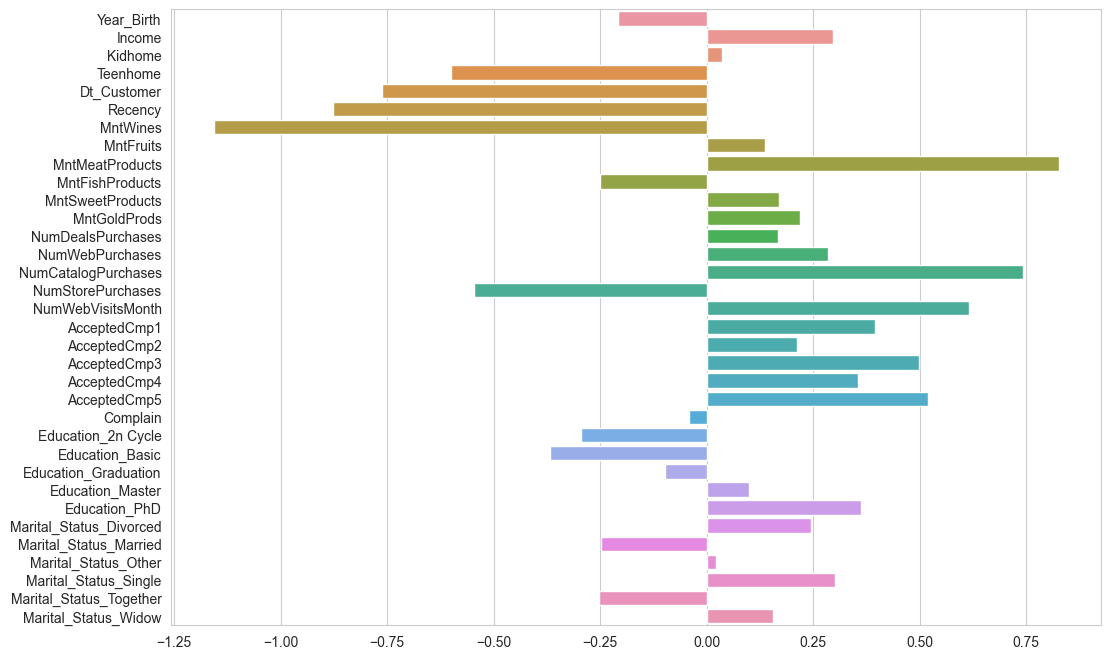

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train.columns, orient='horizontal')

In [53]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       579
           1       0.65      0.47      0.55        93

    accuracy                           0.89       672
   macro avg       0.78      0.72      0.74       672
weighted avg       0.88      0.89      0.88       672



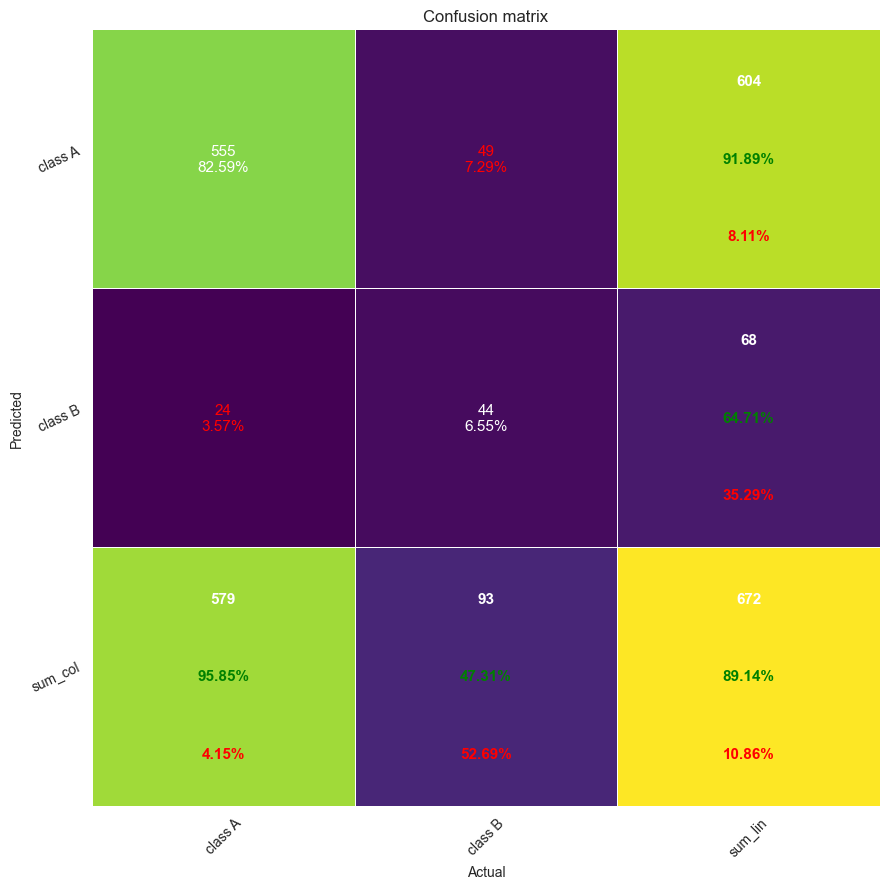

In [54]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Adding the extra feature improved the recall of the second class.

### KNN

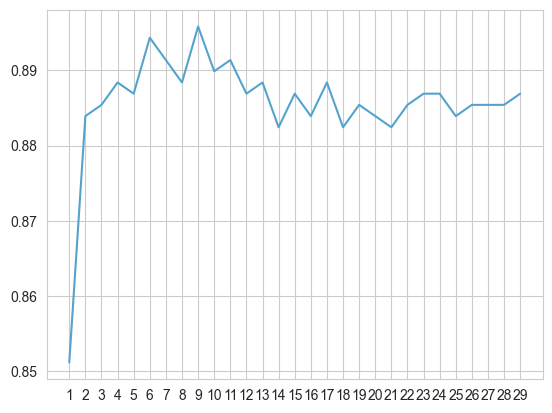

Best N value: 9


In [55]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train, y_train)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [56]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       579
           1       0.77      0.35      0.49        93

    accuracy                           0.90       672
   macro avg       0.84      0.67      0.71       672
weighted avg       0.89      0.90      0.88       672



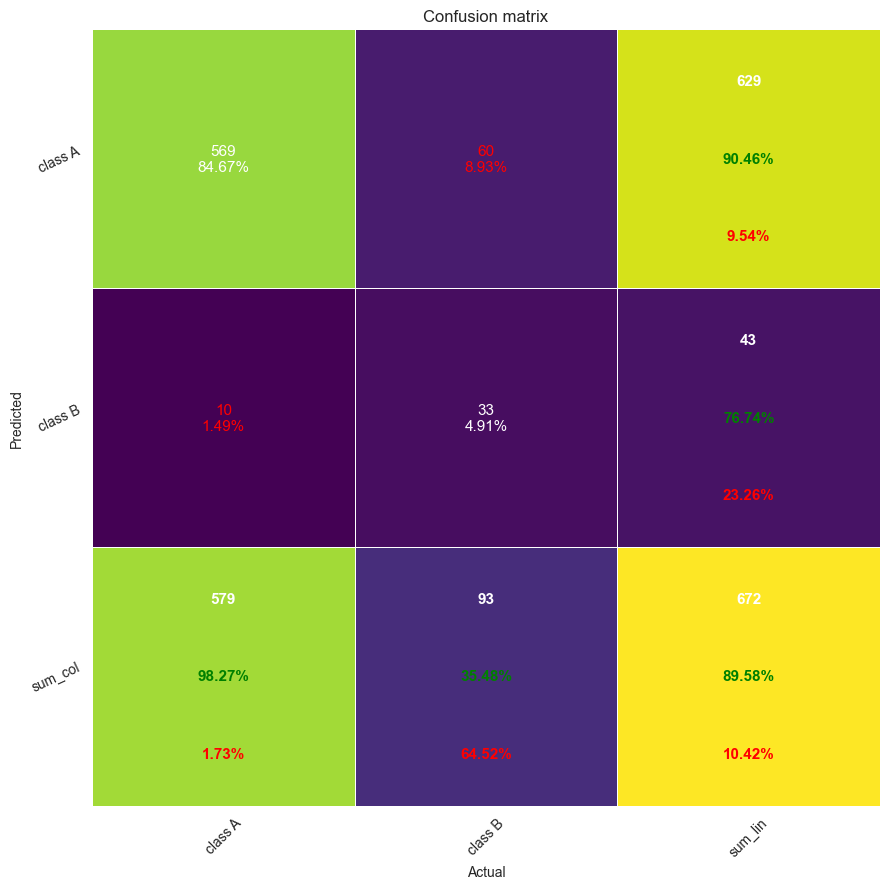

In [57]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

### Decision Tree

In [58]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [59]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

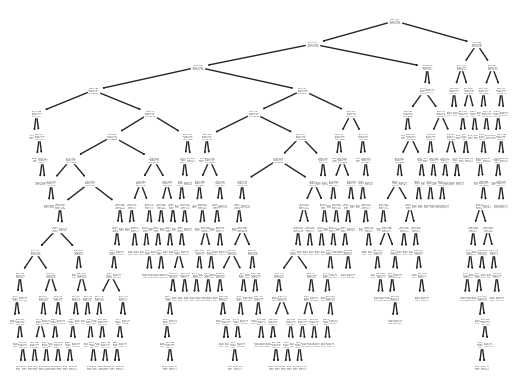

In [60]:
plot_tree(model)
plt.show()

In [61]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       579
           1       0.48      0.48      0.48        93

    accuracy                           0.86       672
   macro avg       0.70      0.70      0.70       672
weighted avg       0.86      0.86      0.86       672



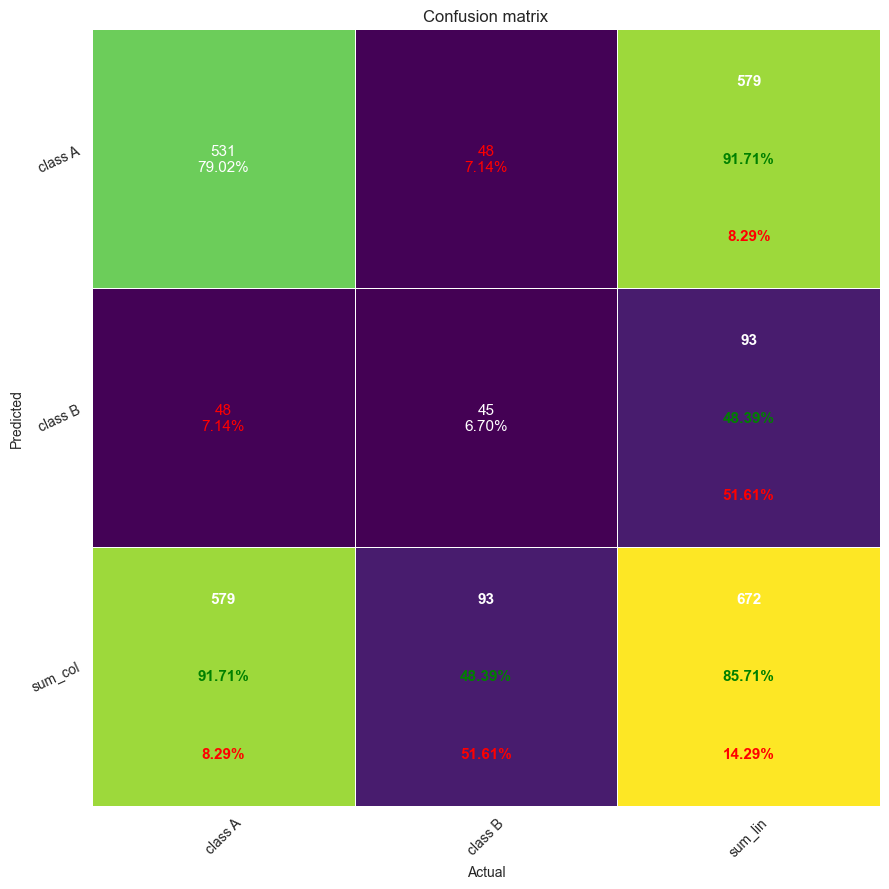

In [62]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

### Random Forest

In [63]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [64]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       579
           1       0.65      0.44      0.53        93

    accuracy                           0.89       672
   macro avg       0.78      0.70      0.73       672
weighted avg       0.88      0.89      0.88       672



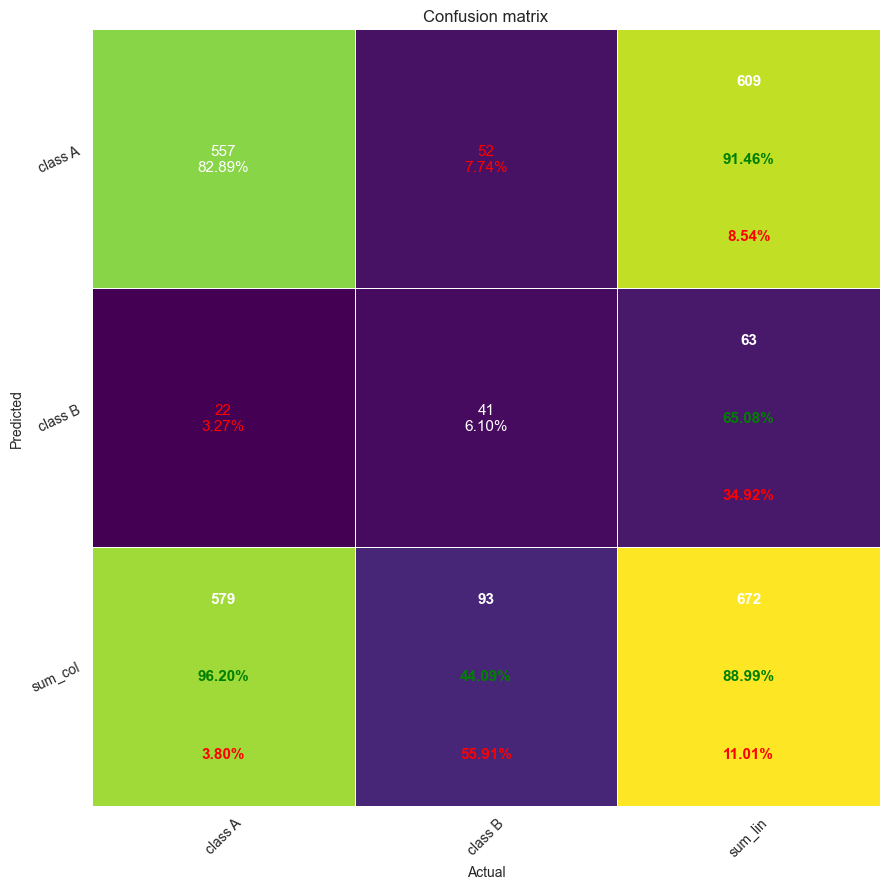

In [66]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

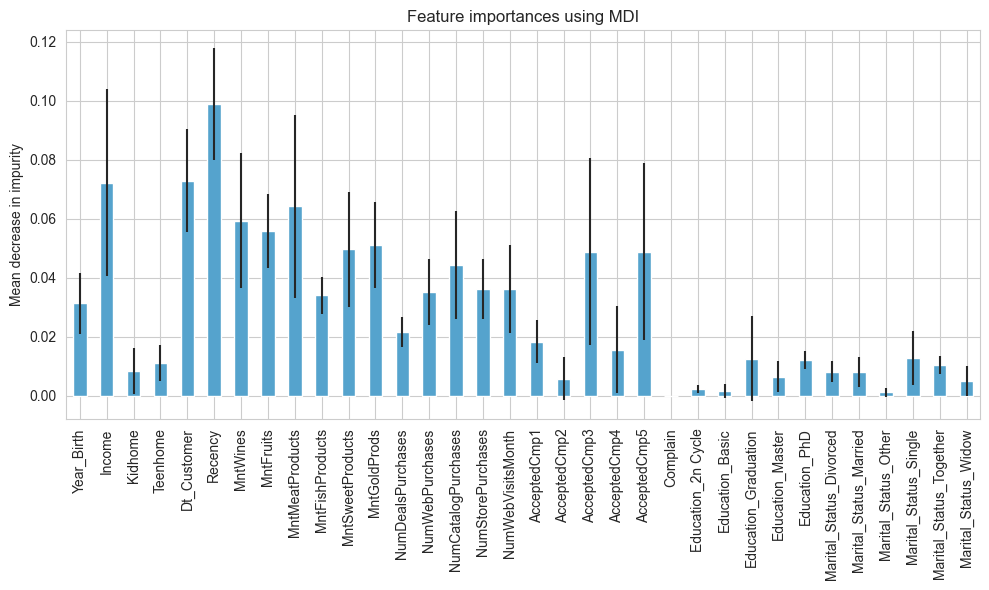

In [67]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train, y_train)

In [69]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       579
           1       0.66      0.47      0.55        93

    accuracy                           0.89       672
   macro avg       0.79      0.72      0.74       672
weighted avg       0.88      0.89      0.89       672



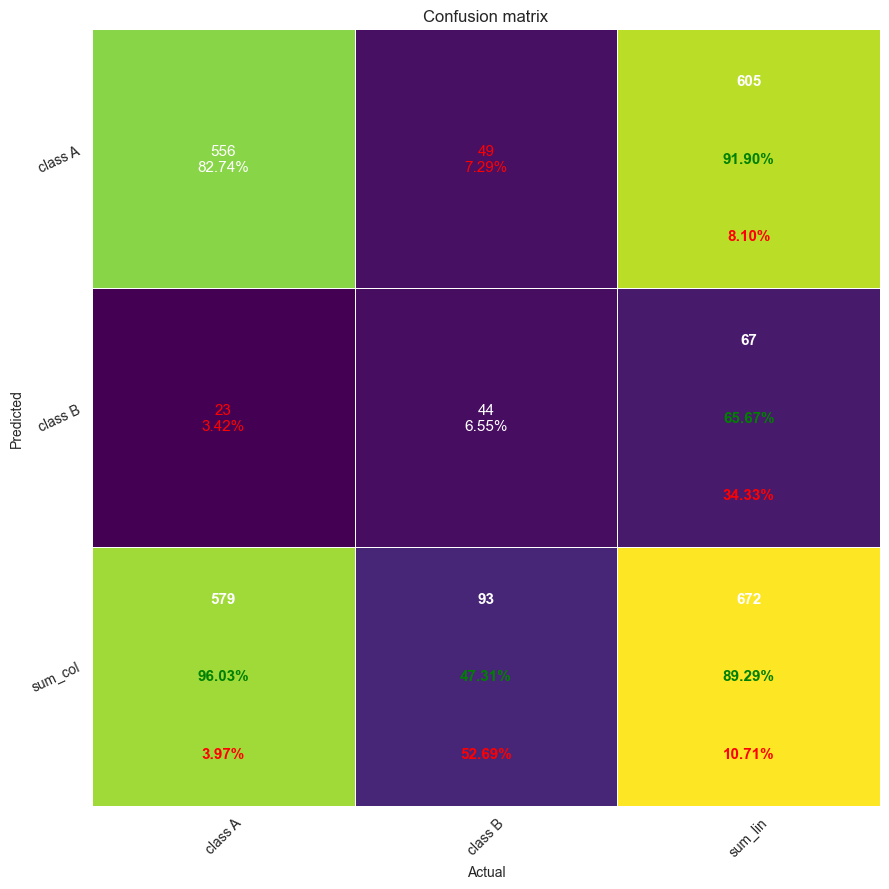

In [70]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

## Add group and encode education

### Preprocessing

In [71]:
def preprocess_inputs(df, scale=False):
    df = df.copy()

    # drop columns
    df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

    # encode date
    df['Dt_Customer'] = [transform_date(df.iloc[index]['Dt_Customer']) for index in range(df.shape[0])]

    # fill the missing values in Income with mode
    df['Income'] = df['Income'].fillna(df['Income'].mode()[0])

    # replace Marital_Status values
    df = df.replace('Alone','Single') # replace 'Alone' with 'Single'
    df = df.replace('YOLO', 'Other') # replace 'YOLO' with 'Other'
    df = df.replace('Absurd','Other') # replace 'Absurd' with 'Other'

    # log some numerical columns
    log_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    for col in log_columns:
        df[col] = np.log1p(df[col])

    # transform education
    df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 1)
    df['Education'] = df['Education'].replace(['Basic'], 0)

    # one hot encode columns
    one_hot_columns = ['Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
    dummies = pd.get_dummies(df[one_hot_columns])
    df = df.drop(one_hot_columns, axis=1)

    result = pd.concat([df, dummies], axis=1)

    X = result.drop(['Response'], axis=1)
    y = result['Response']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    if scale:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [72]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True)

### Logistic Regression

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.9017857142857143
Test score:  0.8869047619047619


<AxesSubplot: >

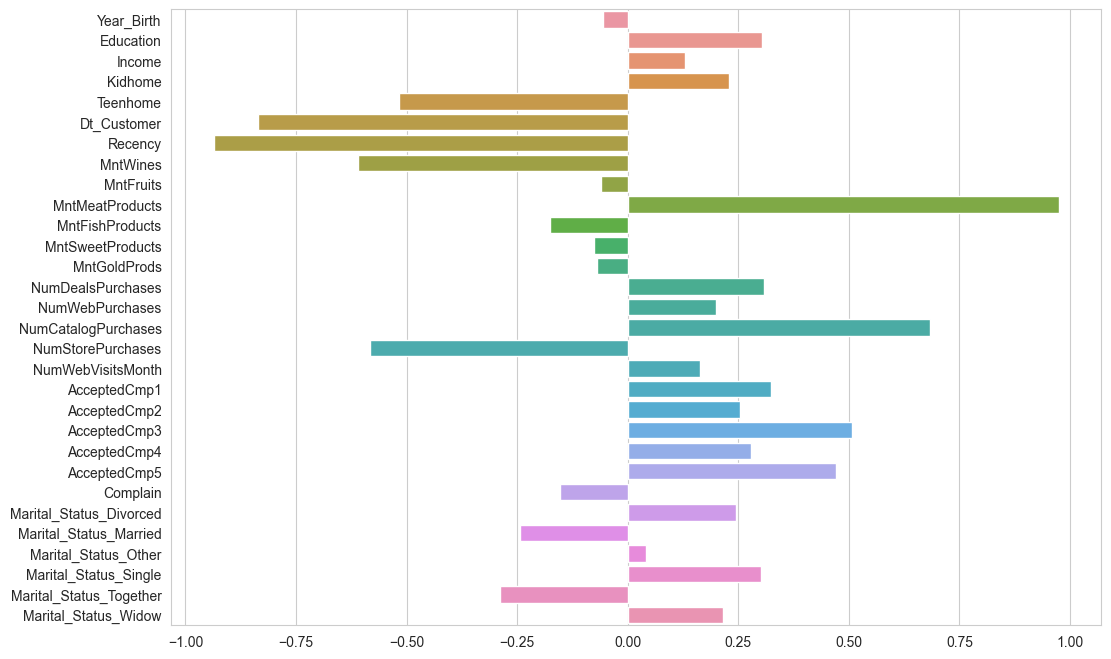

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train.columns, orient='horizontal')

In [75]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       559
           1       0.76      0.48      0.59       113

    accuracy                           0.89       672
   macro avg       0.83      0.72      0.76       672
weighted avg       0.88      0.89      0.88       672



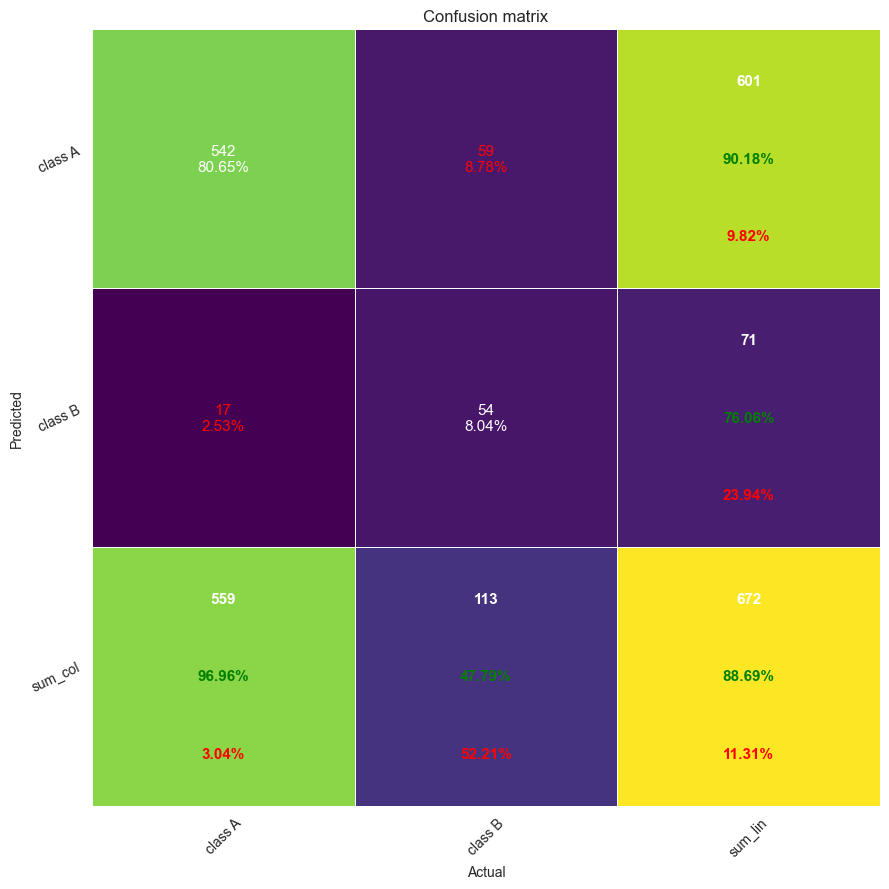

In [76]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

### KNN

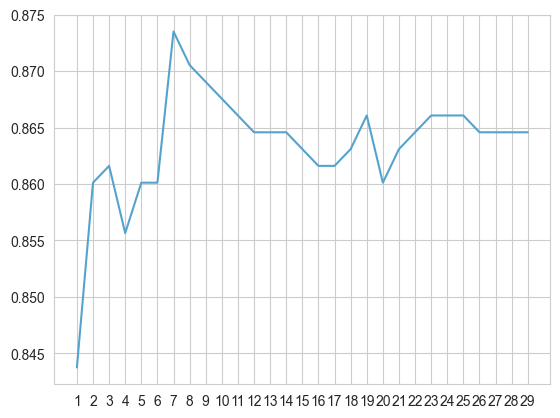

Best N value: 7


In [77]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train, y_train)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [78]:
print('Best N value: ' + str(model.get_params()['n_neighbors']))
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

Best N value: 7
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       559
           1       0.78      0.35      0.48       113

    accuracy                           0.87       672
   macro avg       0.83      0.66      0.70       672
weighted avg       0.86      0.87      0.85       672



              precision    recall  f1-score   support

           0       0.88      0.98      0.93       559
           1       0.78      0.35      0.48       113

    accuracy                           0.87       672
   macro avg       0.83      0.66      0.70       672
weighted avg       0.86      0.87      0.85       672



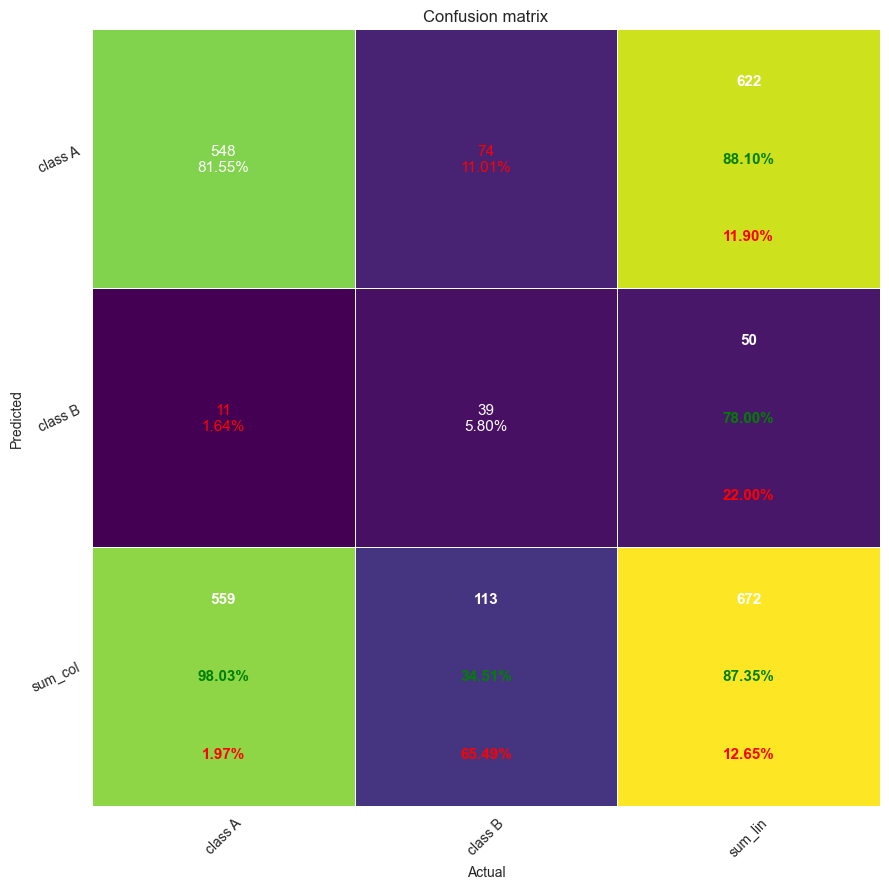

In [79]:
print(classification_report(y_test, y_pred, target_names=target_names))
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

### Decision Tree

In [80]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [81]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

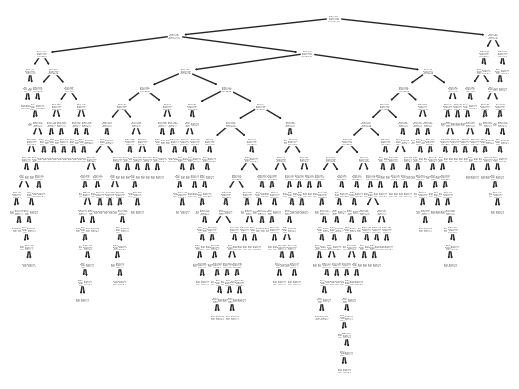

In [82]:
plot_tree(model)
plt.show()

In [83]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       559
           1       0.46      0.49      0.47       113

    accuracy                           0.82       672
   macro avg       0.68      0.69      0.68       672
weighted avg       0.82      0.82      0.82       672



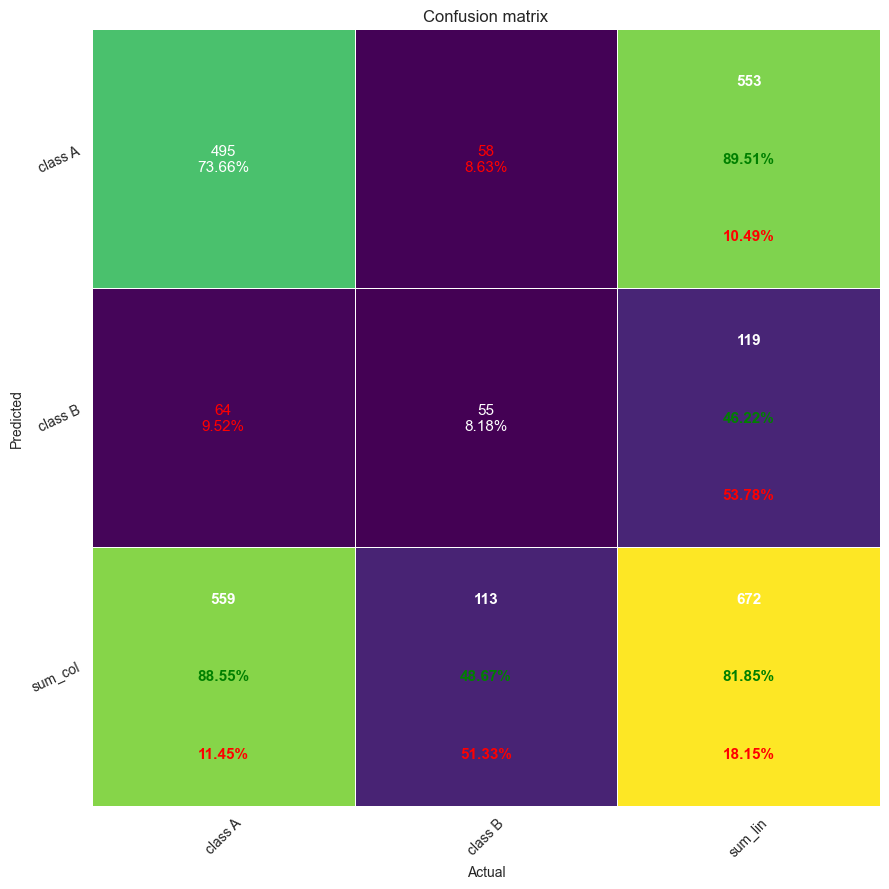

In [84]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

### Random Forest

In [85]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [86]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [87]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       559
           1       0.58      0.51      0.54       113

    accuracy                           0.86       672
   macro avg       0.74      0.72      0.73       672
weighted avg       0.85      0.86      0.85       672



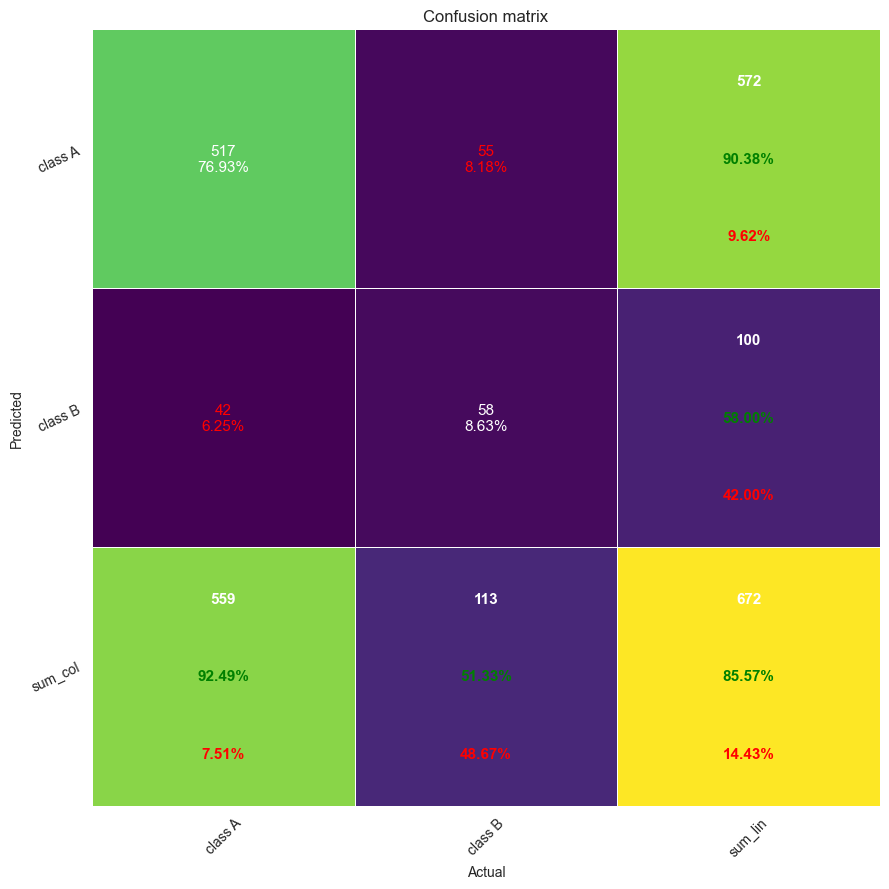

In [88]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

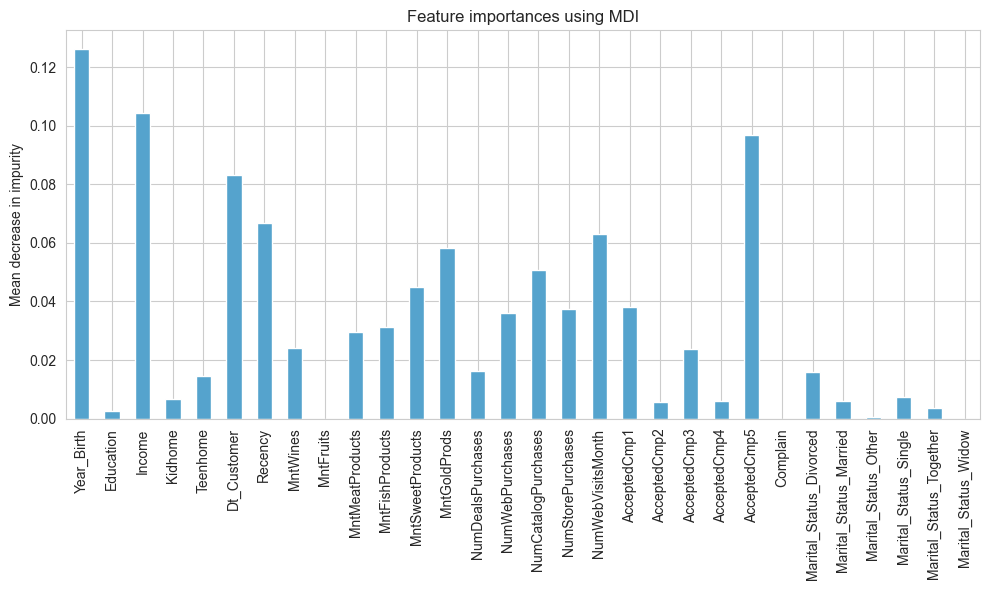

In [89]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train, y_train)

In [92]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       559
           1       0.78      0.50      0.61       113

    accuracy                           0.89       672
   macro avg       0.84      0.74      0.78       672
weighted avg       0.89      0.89      0.88       672



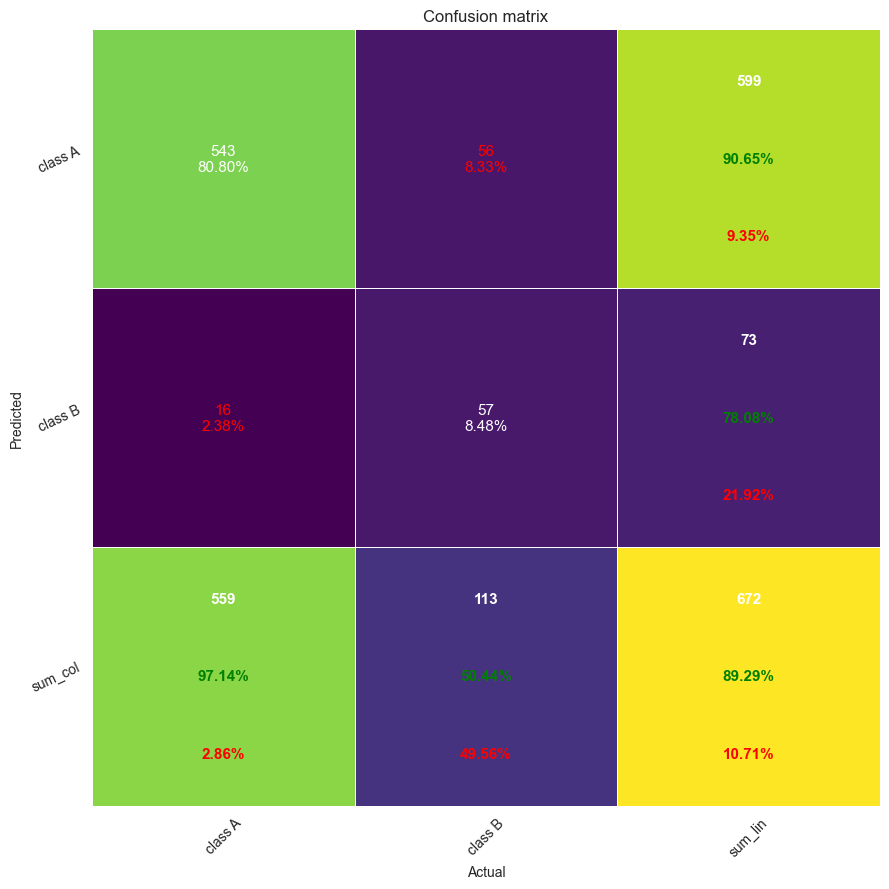

In [93]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])